## Introduction

In this report, we are exploring the SuperStore dataset trying to find insights. Here is where you can get the [dataset](https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset/code). This is part of [HNG 12 Step 0 task](https://hng.tech/internship) in the data analysis track.

## Observations

We will first start by making the necessary imports and reading the file.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("SampleSuperstore.csv", encoding='latin-1')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


We then look into the shape of the data frame which informs us of the rows and columns. By finding the info, we can be sure there are no null values. An anomaly we see is that  Postal Code is listed as an integer. We convert it to string to avoid any manipulation on it.

In [38]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [21]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
df['Postal Code'] = df['Postal Code'].astype(str)
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


To be able to make a more insightful analysis we find number of unique values in each column.

In [60]:
# Count unique values in each column using nunique()
n = df.nunique()

print("Number of unique values in each column:\n", n)

Number of unique values in each column:
 Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


We use groupby to find the top selling category and it was Technology.

In [54]:
top_selling_per_category = df.groupby('Category')['Sales'].sum().sort_values( ascending=False).reset_index()
top_selling_per_category

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


We also found that the West had more sales.

In [56]:
top_selling_per_region = df.groupby('Region')['Sales'].sum().sort_values( ascending=False).reset_index()
top_selling_per_region

,Region,Sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


We can check if Sales, Quantity, Discount, and Profit are correlated. This allows for insight that gives room to more analysis. Discount has a negative correlation with both Sales & Profit.

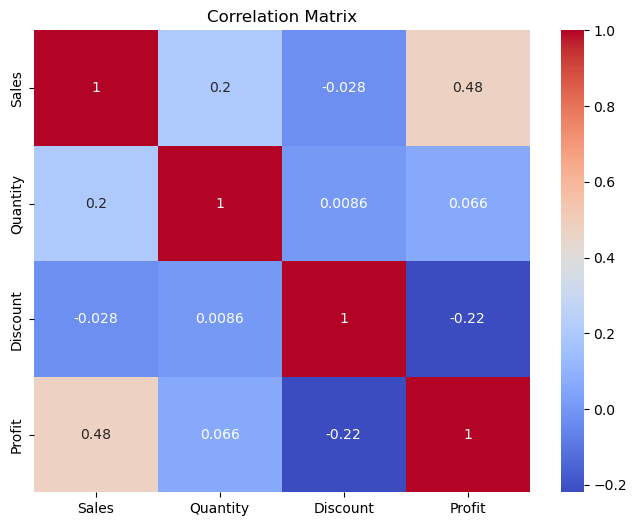

In [81]:
# Calculate correlations
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Conclusion

There's room for further observation like finding out whether the States with the least sales revenue give more discounts. The relationship between sales and profit could also help the departments understand if they are selling competitively. We could also look into sub-categories and check which had more discounts and sold more both in quantity and revenue. Later, we can use maps for geographical analysis.